In [36]:
import pandas as pd

data = pd.read_csv('multiTimeline.csv')

In [35]:
data.columns

Index(['Month', 'MBTI: (Worldwide)',
       'Myers–Briggs Type Indicator: (Worldwide)', 'Big Five: (Worldwide)'],
      dtype='object')

In [37]:
data = data.drop(labels=['Myers–Briggs Type Indicator: (Worldwide)', 'Big Five personality traits: (Worldwide)'], axis=1)

<AxesSubplot:xlabel='Time', ylabel='Popularity'>

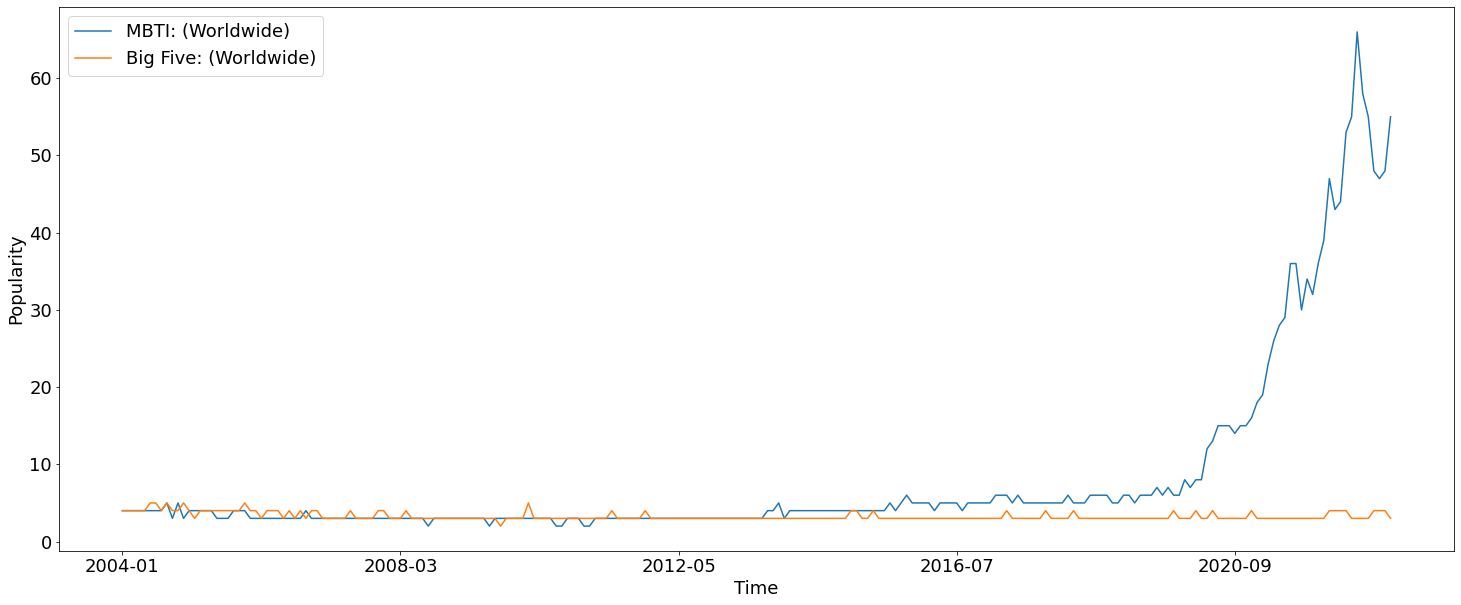

In [38]:
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 18}

plt.rc('font', **font)

data.plot.line(x='Month', figsize=(25,10), xlabel='Time', ylabel='Popularity')

In [3]:
data_profiles = pd.read_csv('all_authors_combined_liwc.csv')

/home/dusan/.pyenv/versions/3.7.13/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
print(list(data_profiles.columns))

['author', 'mbti', 'introverted', 'intuitive', 'thinking', 'perceiving', 'gender', 'age', 'enneagram', 'country', 'state', 'type', 'agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism', 'is_description', 'is_percentile', 'is_score', 'contains_details', 'num_comments', 'en_comments', 'en_comments_percentage', 'region', 'continent', 'country_code', 'enneagram_type', 'enneagram_wing', 'is_native_english_country', 'predicted_test', 'test_name', 'test_scale', '16pers_ta', 'test_result_type', 'is_female', 'is_female_pred', 'is_female_proba', 'comments', 'Segment', 'WC', 'WPS', 'Sixltr', 'Dic', 'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future', 'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear', 'social', 'family', 'friend', 'humans', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', '

In [4]:
liwc_cols = ['WC', 'WPS', 'Sixltr', 'Dic', 'funct', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'verb', 'auxverb', 'past', 'present', 'future', 'adverb', 'preps', 'conj', 'negate', 'quant', 'number', 'swear', 'social', 'family', 'friend', 'humans', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'cogmech', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'inhib', 'incl', 'excl', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'relativ', 'motion', 'space', 'time', 'work', 'achieve', 'leisure', 'home', 'money', 'relig', 'death', 'assent', 'nonfl', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP']

mbti_cols = ['introverted', 'intuitive', 'thinking', 'perceiving']

In [5]:
from scipy.stats import pearsonr

col_dict = dict()
for col in mbti_cols:
    col_dict[col] = []
    col_dict['-' + col] = []
    for inner_col in liwc_cols:
        if pearsonr(data_profiles[~data_profiles[col].isnull()][col], data_profiles[~data_profiles[col].isnull()][inner_col])[1] < 0.05:
            if pearsonr(data_profiles[~data_profiles[col].isnull()][col], data_profiles[~data_profiles[col].isnull()][inner_col])[0] < 0:
                col_dict['-' + col].append(inner_col)
            else:
                col_dict[col].append(inner_col)

In [6]:
for k in col_dict:
    print(k)
    col_dict[k] = sorted(col_dict[k], key=str.casefold)
    print(col_dict[k])
    print(len(col_dict[k]))

introverted
['AllPunc', 'article', 'Colon', 'Comma', 'Dash', 'death', 'discrep', 'future', 'inhib', 'leisure', 'money', 'negate', 'number', 'OtherP', 'Parenth', 'quant', 'relig', 'sad', 'see', 'tentat']
20
-introverted
['affect', 'anger', 'anx', 'assent', 'auxverb', 'bio', 'body', 'cogmech', 'conj', 'Dic', 'Exclam', 'family', 'feel', 'filler', 'friend', 'funct', 'health', 'humans', 'i', 'incl', 'motion', 'negemo', 'posemo', 'ppron', 'present', 'pronoun', 'sexual', 'shehe', 'social', 'swear', 'verb', 'we', 'you']
33
intuitive
['achieve', 'article', 'cause', 'certain', 'cogmech', 'Comma', 'death', 'health', 'inhib', 'insight', 'ipron', 'preps', 'quant', 'Quote', 'relig', 'sad', 'Sixltr', 'we', 'WPS']
19
-intuitive
['Apostro', 'assent', 'bio', 'body', 'Colon', 'Exclam', 'family', 'filler', 'friend', 'hear', 'home', 'i', 'ingest', 'leisure', 'motion', 'number', 'past', 'percept', 'ppron', 'pronoun', 'relativ', 'see', 'shehe', 'swear', 'time', 'verb']
26
thinking
['achieve', 'anger', 'artic